## Árboles de decisión para Regresión ##

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv('DataSets/libre.csv')
data.head()

,t,y
0,0.684784,7.993583
1,0.574845,6.988172
2,0.940745,10.176502
3,0.724918,7.523874
4,0.018540,4.814125


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


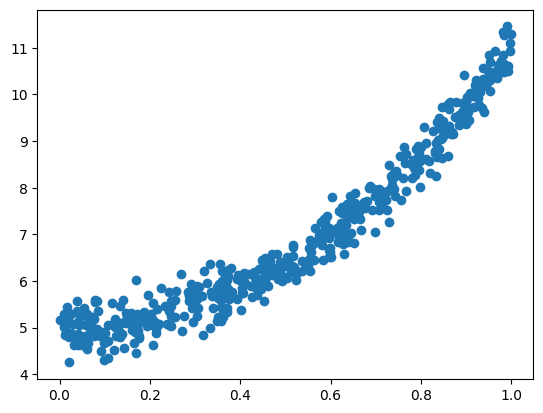

In [4]:
plt.scatter(data[['t']], data[['y']])
plt.show()

In [5]:
x = np.array(data[['t']])
y = np.array(data[['y']])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
tree_r = DecisionTreeRegressor()
tree_r.fit(x_train,y_train)
y_pred = tree_r.predict(x_test)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9532948462512805
0.1617563939650162


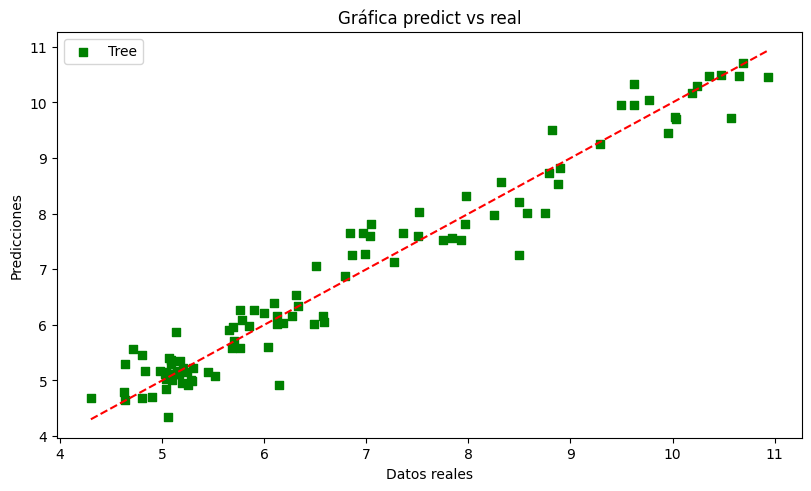

In [7]:
fig, ax = plt.subplots(1, figsize=(8, 4.8), layout='constrained')

ax.scatter(y_test,y_pred, label='Tree', marker='s', c='green')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', ls='--')
ax.set_xlabel('Datos reales')
ax.set_ylabel('Predicciones')
ax.set_title('Gráfica predict vs real')

ax.legend()
plt.show()

In [8]:
tree_r_p = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=3)
tree_r_p.fit(x_train,y_train)
y_pred_p = tree_r_p.predict(x_test)

print(r2_score(y_test, y_pred_p))
print(mean_squared_error(y_test, y_pred_p))

0.9691906651037647
0.10670357579996578


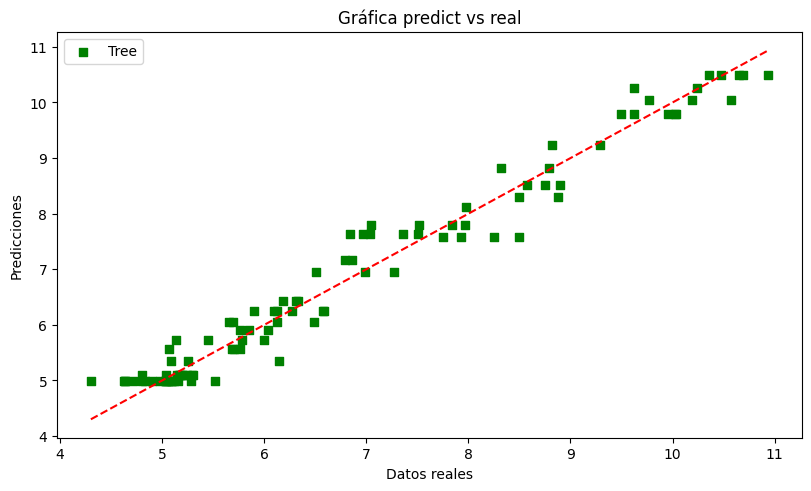

In [9]:
fig, ax = plt.subplots(1, figsize=(8, 4.8), layout='constrained')

ax.scatter(y_test,y_pred_p, label='Tree', marker='s', c='green')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', ls='--')
ax.set_xlabel('Datos reales')
ax.set_ylabel('Predicciones')
ax.set_title('Gráfica predict vs real')

ax.legend()
plt.show()

In [ ]:
from sklearn.tree import plot_tree

plot = plot_tree(decision_tree=tree_r, feature_names=['t'])

In [ ]:
plot_p = plot_tree(decision_tree=tree_r_p, feature_names=['t'])

In [ ]:
tree_r_a = DecisionTreeRegressor(ccp_alpha = 0.001)
tree_r_a.fit(x_train,y_train)

y_pred_a = tree_r_a.predict(x_test)

print(r2_score(y_test, y_pred_a))
print(mean_squared_error(y_test, y_pred_a))

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 4.8), layout='constrained')

ax.scatter(y_test,y_pred_p, label='Tree', marker='s', c='green')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', ls='--')
ax.set_xlabel('Datos reales')
ax.set_ylabel('Predicciones')
ax.set_title('Gráfica predict vs real')

ax.legend()
plt.show()

In [ ]:
plot_a = plot_tree(decision_tree=tree_r_a, feature_names=['t'])

In [ ]:
path = tree_r_a.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

alphas = []
mse = []

for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(ccp_alpha=alpha)
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    alphas.append(alpha)
    mse.append(mean_squared_error(y_test, y_pred))
    # print(f'ccp_alpha = {alpha:.7f}, r2 = {r2_score(y_test, y_pred):.5f}, mse = {mean_squared_error(y_test, y_pred):.5f}')}

best_alpha = alphas[np.argmin(mse)]
print(best_aplha)

In [ ]:
tree_r_ba = DecisionTreeRegressor(ccp_alpha = best_alpha)
tree_r_ba.fit(x_train,y_train)

y_pred_ba = tree_r_ba.predict(x_test)

print(r2_score(y_test, y_pred_ba))
print(mean_squared_error(y_test, y_pred_ba))

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 4.8), layout='constrained')

ax.scatter(y_test,y_pred_ba, label='Tree', marker='s', c='green')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', ls='--')
ax.set_xlabel('Datos reales')
ax.set_ylabel('Predicciones')
ax.set_title('Gráfica predict vs real')

ax.legend()
plt.show()

In [ ]:
plot_ba = plot_tree(decision_tree=tree_r_ba, feature_names=['t'])